<a href="https://colab.research.google.com/github/pedroleao09/AnaliseDeDadosPython01/blob/main/Imers%C3%A3oDadosAlura01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de Dados em Python - Passos Iniciais**

# Análise de Dados - Introdução - Análise Básica de Média e Mais Frequentes, além de Renomeação de Colunas


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

O Python sempre traz as 5 primeiras, mas podemos colocar quantas quiser como parâmetro

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Podemos utilizar o .info para extrair informações no terminal da nossa base de dados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


É possível obter apenas os dados numéricos com describe()

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


Um objeto do Pandas pode nos dar seus tamanho com o atributo .shape() - (Linhas,Colunas)

In [6]:
print(df.shape)
linhas, colunas = df.shape[0], df.shape[1]
print(f"Linhas do seu banco de dados: ",linhas)
print(f"Colunas do seu banco de dados:",colunas)


(133349, 11)
Linhas do seu banco de dados:  133349
Colunas do seu banco de dados: 11


Podemos extrair o nome das colunas do banco de dados

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Fazemos a substituição das colunas para algo traduzido

In [8]:
# É criado um dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=novos_nomes, inplace = True)

df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


O parâmetro `inplace=True` na função `.rename()` do Pandas significa que a operação de renomeação será aplicada diretamente ao DataFrame original (`df`), modificando-o no local. Se `inplace` fosse `False` (que é o padrão), a função retornaria um novo DataFrame com as colunas renomeadas, e o DataFrame original (`df`) permaneceria inalterado. Para aplicar as mudanças, seria necessário atribuir o resultado de volta à variável `df`, como `df = df.rename(columns=novos_nomes)`.

In [9]:
# Verificar a frequência das diferentes informações em uma determinada coluna.
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [10]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [11]:
senioridade = {
    "SE": "Senior",
    "MI": "Pleno",
    "EN": "Junior",
    "EX": "Executivo"
}

df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [12]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df["contrato"] = df["contrato"].replace(contrato)
df["contrato"].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [13]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [14]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()


,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [15]:
# Agora com tudo atualizado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,Senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,Pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,Pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,Junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [16]:
# Expondo contagem de dados, quantos são únicos, o mais frequente e sua respectiva frequência
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [17]:
# Fazemos a análise agora para as numéricas, não é preciso de parâmetro
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.

# Análise de Dados - Introdução - Tratamento de Dados

In [18]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


Onde está nosso valores faltantes?

In [19]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


Vamos identificar quais são os diferentes dados (únicos) dentro da nossa base

In [20]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [21]:
# Podemos filtrar esses valores nulos.
# O any() encontra os True e axis=1 indica uma abordagem linha por linha
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,Pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,Junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,Senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,Senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,Senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,Senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,Junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,Pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,Pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


**Vamos realizar diferentes métodos de tratamento:**

Preenchimento: Podemos colocar valores médios ou de mediana, não "descalibrando" seus dados

In [22]:
import numpy as np

df_salarios = pd.DataFrame({
    "nome": ["João", "Maria", "José", "Ana", "Val"],
    "salario": [1000, np.nan,4000,np.nan,100000]
})
# Criamos uma novo coluna que receberá os valores nulos de Salário do DataFrame
# acima preechido com a mediana dos valores
# round(2) é arredondamento com 2 casas decimais.
df_salarios["salario_media"] = df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2))
# A Mediana tende a estar menos contaminada com outliers
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(df_salarios["salario"].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,João,1000.0,1000.0,1000.0
1,Maria,NaN,35000.0,4000.0
2,José,4000.0,4000.0,4000.0
3,Ana,NaN,35000.0,4000.0
4,Val,100000.0,100000.0,100000.0


Duplicaremos um valor que já faz parte do Banco de Dados

In [23]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda","Terça","Quarta","Quinta","Sexta"],
    "Temperatura": [30,np.nan,np.nan,28,29]
})

df_temperaturas["Preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas


,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,29.0,29.0


O método ffill é Forward Fill, preenche o atual com o valor anterior.
Temos bfill também, que vem de Back.

In [24]:
# Podemos preencher com valores arbitrários
df_cidades = pd.DataFrame({
    "nome": ["João", "Maria", "José", "Ana", "Val"],
    "cidade": ["São Paulo", np.nan,"Curitiba", np.nan,"Belém"]
})
df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não Informado")
df_cidades

,nome,cidade,cidade_preenchida
0,João,São Paulo,São Paulo
1,Maria,NaN,Não Informado
2,José,Curitiba,Curitiba
3,Ana,NaN,Não Informado
4,Val,Belém,Belém


Retomando à Base antiga, vemos que nenhum desses métodos é o ideal. Se temos apenas 10 faltantes em mais de 130 mil, excluiremos essas linhas.

In [25]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [26]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,Senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,Pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,Pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,Junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


O ano tem casa decimal, vamos investigar seu tipo

In [27]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [28]:
df_limpo = df_limpo.assign(ano= df_limpo['ano'].astype("int64"))
df_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,Senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,Pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,Pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,Junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,integral,Data Scientist,412000,USD,412000,US,remoto,US,grande
133345,2021,Pleno,integral,Principal Data Scientist,151000,USD,151000,US,remoto,US,grande
133346,2020,Junior,integral,Data Scientist,105000,USD,105000,US,remoto,US,pequena
133347,2020,Junior,contrato,Business Data Analyst,100000,USD,100000,US,remoto,US,grande


In [29]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Análise de Dados - Introdução - Gráficos

In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,Senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,Pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,Pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,Junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Voltamos pro value_counts para quantificar os diferentes tipo de dados.
Usamos agora a função plot que tem parâmetros como kind e title.

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

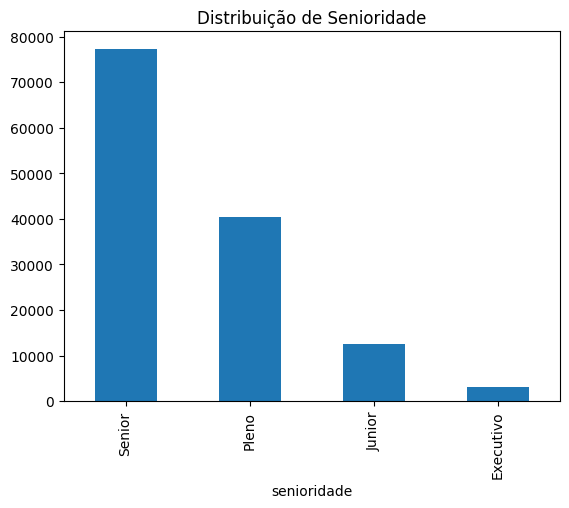

In [32]:
df_limpo["senioridade"].value_counts().plot(kind="bar", title="Distribuição de Senioridade")


<Axes: xlabel='senioridade', ylabel='usd'>

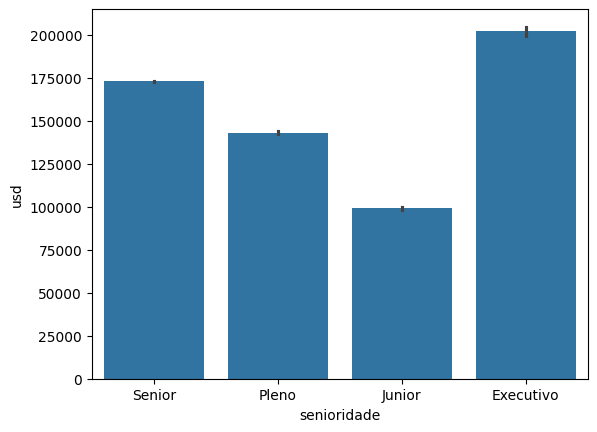

In [33]:
import seaborn as sns

sns.barplot(data=df_limpo, x="senioridade", y="usd")

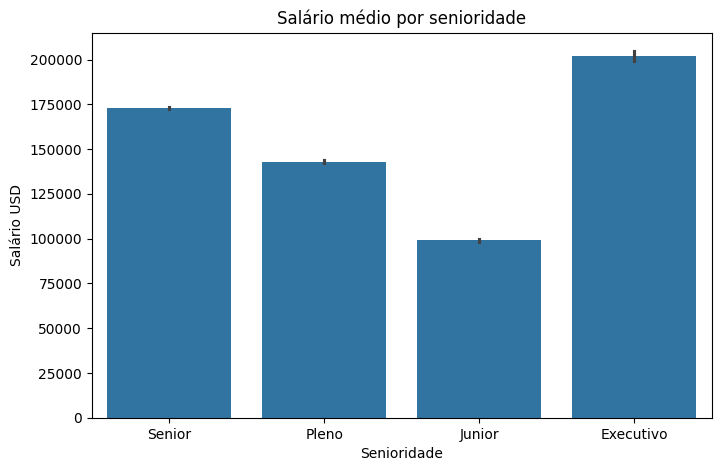

In [34]:
import matplotlib.pyplot as plt

# Tamanho genérico para algo retangular
plt.figure(figsize=(8,5))

# Que tipo de dados o seaborn vai utilizar?
# Por padrão, o barplot calcula a média dos salários para cada nível
#de senioridade e exibe essa média como a altura das barras.
sns.barplot(data=df_limpo, x="senioridade", y="usd")
# Customização
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário USD")
plt.show()


In [35]:
# groupby une valores únicos
# Com o cálculo, extraímos apenas informações de salário em dólar
# É tirada a média e organizado os valores do maior ao menor
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).round(2)

,usd
senioridade,
Executivo,202027.67
Senior,172850.84
Pleno,143044.85
Junior,99034.96


In [36]:
ordem=df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).round(2).index
# Index extrai apenas os índices, os títulos principais em uma lista
print(ordem)

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')


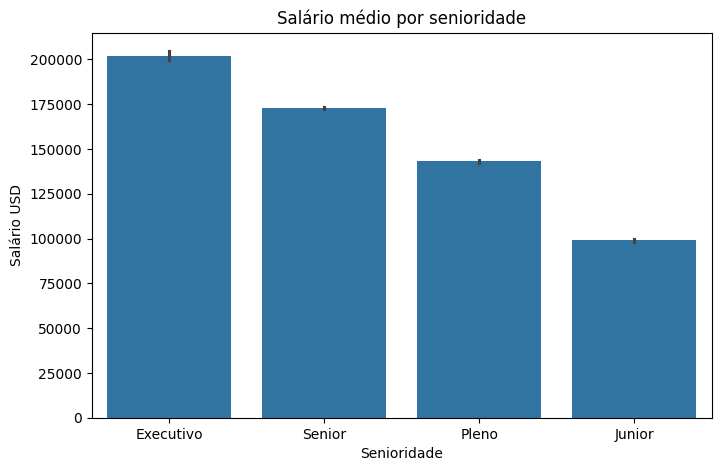

In [37]:
plt.figure(figsize=(8,5))
# Completando agora com o parâmetro order
sns.barplot(data=df_limpo, x="senioridade", y="usd", order=ordem)
# Customização
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário USD")
plt.show()

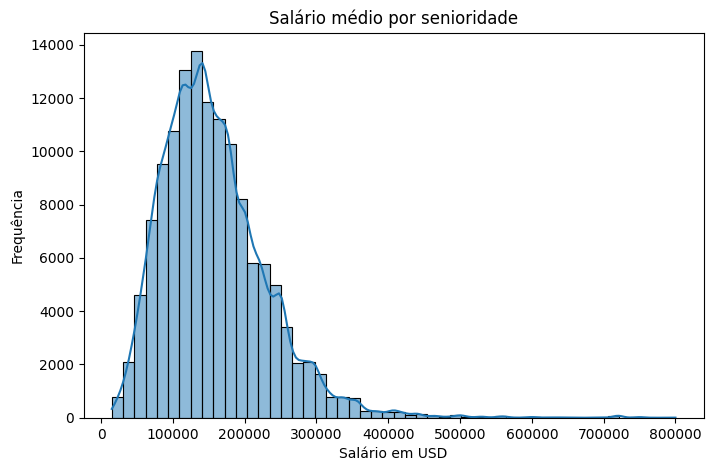

In [50]:
plt.figure(figsize=(8,5))
# Podemos plot um histograma, que nos mostra a frequência de valores
# Bins é basicamente a largura de uma barra. Quanto maior for o bins, mais granulado fica
# KDE faz as linhas para monitoramento do pico dos dados. Estimativa de Densidade de Kernel
# A linha KDE suaviza a distribuição e ajuda a visualizar a forma geral da distribuição dos dados.
sns.histplot(df_limpo["usd"], bins =50, kde=True)
plt.title("Salário médio por senioridade")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

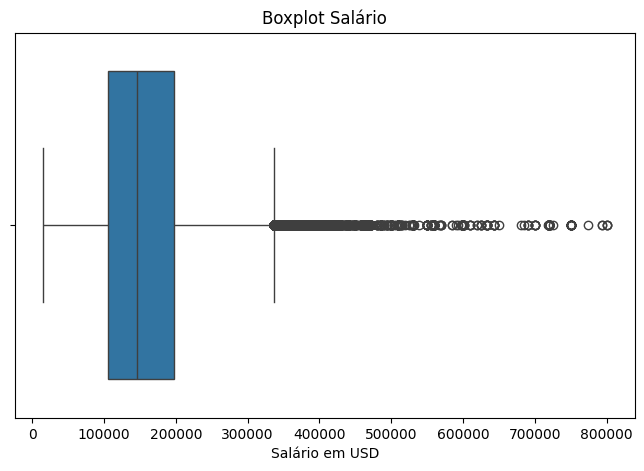

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo["usd"])
# Também sobre distribuição. Será uma caixa mostrando variância. A linha no meio
#é a mediana
# Os pontos fora da área são todos outliers
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

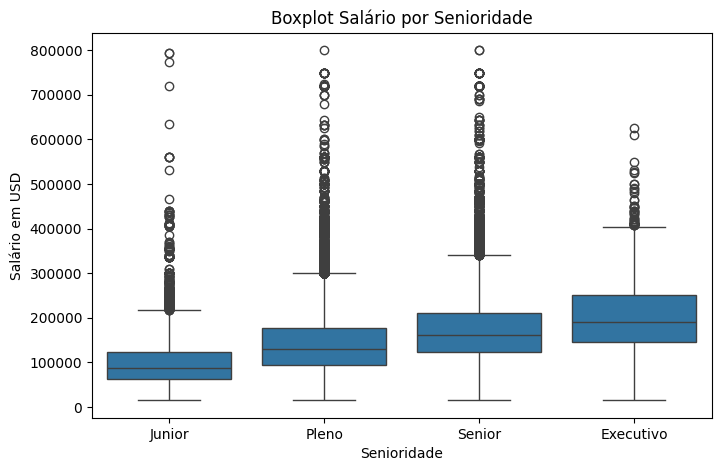

In [56]:
ordem_senioridade = ["Junior", "Pleno", "Senior", "Executivo"]

plt.figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade)
# Podemos enxergar os outliers com mais facilidade. Podemos ver que temos
#seniores, pleno e juniores com salário até maiores que executivos
plt.title("Boxplot Salário por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário em USD")
plt.show()

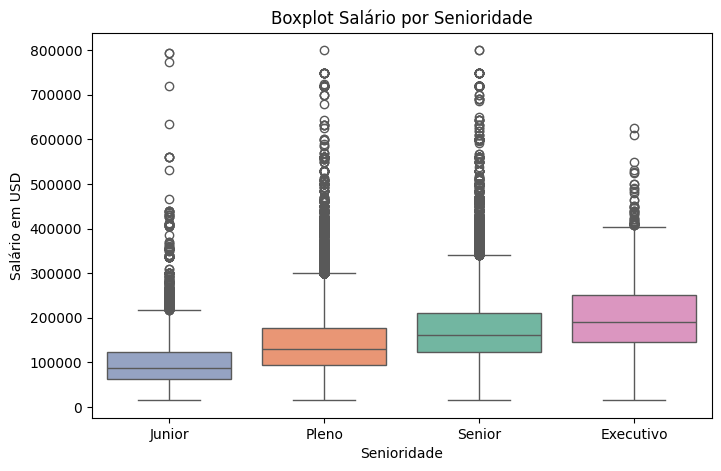

In [57]:
ordem_senioridade = ["Junior", "Pleno", "Senior", "Executivo"]

plt.figure(figsize=(8,5))
# Vamos customizar nossas cores com o parâmetro palette
# O hue distribui as cores para cada variável
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade, palette="Set2", hue="senioridade")
# Podemos enxergar os outliers com mais facilidade. Podemos ver que temos
#seniores, pleno e juniores com salário até maiores que executivos
plt.title("Boxplot Salário por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário em USD")
plt.show()

In [58]:
import plotly.express as px
#Biblioteca bem interessante

# Revisando, groupby separa os tipos de senioridade que temos, extrai o USD
senioridade_media_salario= df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x="senioridade",
             y="usd",
             title = "Média Salarial por Senioridade",
             labels = {"usd": "Média Salarial Anual (USD)", "senioridade": "Nível de Senioridade"})
fig.show()

In [61]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Proporção dos tipos de trabalho",
             hole=0.5
             )
fig.show()

In [63]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Proporção dos tipos de trabalho",
             hole=0.5
             )
# O update_traces traz uma melhor organização visual, expondo por exemplo o título e porcentagem em tela
fig.update_traces(textinfo="percent+label")
fig.show()

In [64]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,Senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,Pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,Pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,Junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [69]:
# Filtrando a base de dados para um cargo específico
cargo_especifico = "Data Scientist"
df_cargo_filtrado = df_limpo[df_limpo["cargo"] == cargo_especifico]

df_cargo_filtrado.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
6,2025,Senior,integral,Data Scientist,185000,USD,185000,US,presencial,US,media
7,2025,Senior,integral,Data Scientist,148000,USD,148000,US,presencial,US,media
8,2025,Pleno,integral,Data Scientist,135000,USD,135000,CA,presencial,CA,media
9,2025,Pleno,integral,Data Scientist,108000,USD,108000,CA,presencial,CA,media
65,2025,Senior,integral,Data Scientist,258000,USD,258000,US,presencial,US,media


In [70]:
# Média salarial dos países pelo cargo específico que selecionamos
salario_medio_pais_cargo = df_cargo_filtrado.groupby("empresa")["usd"].mean().sort_values(ascending=True).reset_index()

fig = px.bar(
    salario_medio_pais_cargo,
    x="empresa",
    y="usd",
    title=f"Média Salarial para {cargo_especifico} por País",
    labels={"usd": "Média Salarial Anual (USD)", "empresa": "País"}
)

fig.show()